In [1]:
import pandas as pd

# 1. Series 
'1차원' 데이터 실수, 정수, 문자열 등

In [2]:
type(1)
Patient = {
    age = 13
    Gender = Male
    
    입원 = 0, 1 -> 병원 환자실 database 올려야함
    
}

int

In [2]:
# 객체
pd.Series

pandas.core.series.Series

In [3]:
# 함수 원형 및 사용방법
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Ser

In [3]:
# 단순 숫자 리스트 만들기
Digits = [1, 2, 3]

In [4]:
# Series로 변환
Digits_Series = pd.Series(Digits)

In [5]:
print('List 출력:', Digits)
print('Seires 출력:\r\n', Digits_Series)

List 출력: [1, 2, 3]
Seires 출력:
 0    1
1    2
2    3
dtype: int64


In [6]:
# 여러 타입이 혼용되는 리스트
Digits = ['1', 2, 3]

In [7]:
print(Digits)

['1', 2, 3]


In [8]:
Digits_Series = pd.Series(Digits)

In [9]:
# 여러 타입이 혼용된 리스트의 출력, '1' 이라고 표시되지 않음
# 주로 많이 나오는 실수들.

# csv 파일 안에 data frame으로 자동으로 읽었을 때, 동일한 type으로 변수를 읽는 경우가 종종 발생
print(Digits_Series)

0    1
1    2
2    3
dtype: object


In [10]:
print(type(Digits_Series[0]))
print(type(Digits_Series[1]))
print(type(Digits_Series[2]))

<class 'str'>
<class 'int'>
<class 'int'>


# 딕셔너리 데이터와 Series

In [15]:
dict_data = {'a':1,'b':2,'c':3}

In [16]:
dict_data['a']

1

In [17]:
# Error 발생
dict_data[a]

NameError: name 'a' is not defined

In [18]:
# dictionary 타입의 데이터로부터 series 객체 생성
series_data = pd.Series(dict_data)

In [19]:
print(series_data)

a    1
b    2
c    3
dtype: int64


In [20]:
print(series_data.index)
print(series_data.values)

Index(['a', 'b', 'c'], dtype='object')
[1 2 3]


In [21]:
series_data.index

Index(['a', 'b', 'c'], dtype='object')

In [22]:
series_data.values

array([1, 2, 3], dtype=int64)

In [23]:
series_data1 = pd.Series([1,2,3], index=['a', 'b', 'c'])

In [24]:
print(series_data)

a    1
b    2
c    3
dtype: int64


In [25]:
print(series_data1)

a    1
b    2
c    3
dtype: int64


# Series, 1차원 데이터에서 분석 사례

# 1. Categorical data (범주형 변수)

In [26]:
import random

In [27]:
random.sample

<bound method Random.sample of <random.Random object at 0x000001C7A25C7F30>>

In [28]:
help(random.sample)

Help on method sample in module random:

sample(population, k, *, counts=None) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    Repeated elements can be specified one at a time or with the optional
    counts parameter.  For example:
    
        sample(['red', 'blue'], counts=[4, 2], k=5)
    
    is equivalent to:
    
        sample(['red', 'red', 'red', 'red', 'blue', 'blue'], k=5)
    
    To choose a sa

https://www.google.com/search?q=python+random

In [29]:
random.sample( ['Female', 'Male'], 2)

['Male', 'Female']

In [30]:
# 주어진 list 이상의 선택 (중복해서 선택) 하는게 불가능.
random.sample( ['Female', 'Male'], 3)

ValueError: Sample larger than population or is negative

In [28]:
# 구글링: python random sample duplicate

https://www.google.com/search?q=python+random+sample+duplicate

In [31]:
# random choice는 duplicates 가능
Gender = random.choices(['Female', 'Male'], k=30)
print(Gender)

['Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male']


In [32]:
# Series로 변환 후 출력
Gender_SR = pd.Series(Gender)
print(Gender_SR)

0     Female
1       Male
2       Male
3     Female
4       Male
5       Male
6     Female
7       Male
8       Male
9     Female
10    Female
11      Male
12    Female
13      Male
14      Male
15      Male
16      Male
17      Male
18    Female
19    Female
20      Male
21    Female
22    Female
23      Male
24      Male
25    Female
26    Female
27      Male
28      Male
29      Male
dtype: object


In [31]:
# 명목형으로서 가능
Gender_SR.value_counts()

Male      17
Female    13
dtype: int64

# 범주형 변수는 주로 0 / 1 등으로 coding 되어있음

In [33]:
Gender = random.choices([0, 1], k=30)
print(Gender)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]


In [34]:
Gender_SR = pd.Series(Gender)

In [ ]:
# 문제점 발생 ! 암 1,2,3,4
1 vs 2기의 차이 = 2기와 3기의 차이 = 3기와 4기의 차이


Categorical
Reference : 1
    -> 1 vs 2 다르냐
    -> 2 vs 3 다르냐
    -> 3 vs 4 다르냐

In [35]:
Gender_SR.describe()

count    30.000000
mean      0.400000
std       0.498273
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
dtype: float64

In [36]:
Gender_SR = Gender_SR.astype("category") # 카테고리 타입으로 바꿔버리기!

In [37]:
Gender_SR.describe()

count     30
unique     2
top        0
freq      18
dtype: int64

In [38]:
Gender_SR

0     0
1     1
2     0
3     1
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    1
14    1
15    1
16    0
17    1
18    0
19    0
20    0
21    1
22    1
23    0
24    0
25    1
26    0
27    0
28    0
29    1
dtype: category
Categories (2, int64): [0, 1]

# Categorical data 범주형 변수 시각화

In [39]:
import seaborn

In [40]:
Gender_SR = pd.Series(
    random.choices(['Female', 'Male', 'Unknown'], k=50)
)

In [41]:
CountData = Gender_SR.value_counts()

In [42]:
CountData.index

Index(['Female', 'Unknown', 'Male'], dtype='object')

In [43]:
CountData.values

array([20, 16, 14], dtype=int64)

<AxesSubplot:>

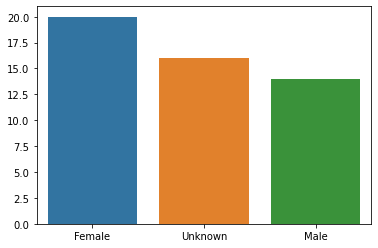

In [44]:
seaborn.barplot(x=CountData.index, y=CountData.values)

In [45]:
Gender_SR.value_counts()

Female     20
Unknown    16
Male       14
dtype: int64

## Y축 Proportion,으로 normalize

In [46]:
Gender_SR.value_counts(normalize=True)

Female     0.40
Unknown    0.32
Male       0.28
dtype: float64

In [47]:
Count_normalized = Gender_SR.value_counts(normalize=True)

In [48]:
Count_normalized.index

Index(['Female', 'Unknown', 'Male'], dtype='object')

<AxesSubplot:>

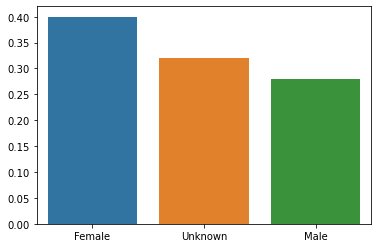

In [49]:
seaborn.barplot(x=Count_normalized.index, y=Count_normalized.values)

In [84]:
# Category type의 경우 자동으로 count plot 가능

In [50]:
Gender = random.choices([0, 1], k=30)
Gender_SR = pd.Series(Gender)
Gender_SR = Gender_SR.astype("category")

<AxesSubplot:ylabel='count'>

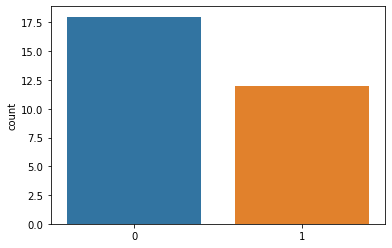

In [51]:
seaborn.countplot(data=Gender_SR, x=Gender_SR.index)

# 2. 연속형변수 및 시각화

In [52]:
import numpy as np

In [53]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

https://www.google.com/search?q=python+generate+normal+distribution+data

In [54]:
Temperature = np.random.normal(30,3,100)

In [55]:
print(Temperature)

[30.39008159 30.73807669 32.51611098 29.34184385 33.10810573 31.94114145
 32.43647144 32.59762837 33.18742305 28.06806577 29.88549149 29.77193275
 28.7801453  30.58402423 30.9896347  27.36213639 33.72026197 24.22700164
 33.52847937 24.6767377  29.22191254 27.60962967 32.42665307 32.12721923
 31.2131923  28.48931586 29.6045052  30.63840834 35.52442216 28.54056588
 28.44096858 28.38723357 30.24933392 27.88198867 31.36666806 30.3640385
 33.73358708 27.50549319 30.38089055 28.67881237 25.43992708 31.51988513
 31.37266586 31.03654034 25.46279251 32.59392536 33.01951197 33.51121053
 29.21533427 30.68777025 28.93841641 27.18010762 34.14614286 27.15384436
 32.22019876 24.76249769 33.3088634  29.52485527 31.09465697 31.69398733
 26.93219944 28.36451699 31.956359   26.05927754 28.37388209 27.50392163
 27.23022928 30.9842855  30.13963295 31.31031417 28.57075225 25.51092272
 30.64324835 30.71134321 32.68996553 28.52549301 26.11500065 32.99909449
 26.73771289 33.94056351 27.89158316 26.86125071 27.

In [56]:
pd.Series(Temperature)

0     30.390082
1     30.738077
2     32.516111
3     29.341844
4     33.108106
        ...    
95    27.723444
96    29.613828
97    33.143201
98    31.678350
99    29.036195
Length: 100, dtype: float64

In [57]:
Temperature_SR = pd.Series(Temperature)

In [58]:
# 최대값 index 출력
Temperature_SR.argmax()

28

In [59]:
# 최대값 출력
Temperature_SR[Temperature_SR.argmax()]

35.52442216462916

In [60]:
# 최소값 index 출력
Temperature_SR.argmin()

17

In [61]:
# 최소값 출력
Temperature_SR[Temperature_SR.argmin()]

24.227001636225058

In [62]:
Temperature_SR.argsort()

0     17
1     19
2     55
3     86
4     40
      ..
95    16
96    36
97    79
98    52
99    28
Length: 100, dtype: int64

Temperature_SR. 탭탭!

In [63]:
# 데이터 정렬
Temperature_SR[Temperature_SR.argsort()]

17    24.227002
19    24.676738
55    24.762498
86    25.074073
40    25.439927
        ...    
16    33.720262
36    33.733587
79    33.940564
52    34.146143
28    35.524422
Length: 100, dtype: float64

<AxesSubplot:>

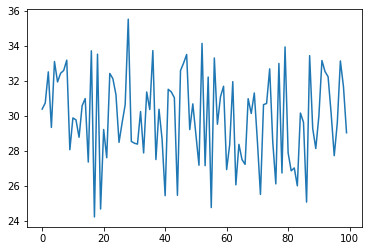

In [64]:
# index가 x축으로 보낸 후, Line plot
# => 아무런 정보가 없는 쓰레기 plot
Temperature_SR.plot()

<AxesSubplot:ylabel='Density'>

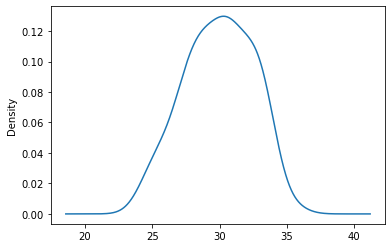

In [65]:
# Density plot
Temperature_SR.plot.density()

In [66]:
# 평균
Temperature_SR.mean()

29.92185301757815

In [67]:
# 표준편차
Temperature_SR.std()

2.548862168733599